In [1]:
#Loading necessary libraries I will be using
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load dataset into variable 'df'
df = pd.read_csv('twenty_mins_data.csv')
df.head()

,Unnamed: 0,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
0,0,482,36403,79,15,16,2,0,1,0,537,37878,16,15,38,1,1,3,0,0
1,0,452,45450,41,31,10,2,1,8,0,400,32273,10,31,136,0,0,3,2,1
2,0,467,38334,39,22,12,2,1,1,0,455,35596,12,22,34,0,0,5,0,1
3,0,425,32749,67,12,16,0,1,0,0,466,36281,16,12,47,3,0,3,0,0
4,0,472,36853,47,17,8,2,1,1,0,511,32248,8,17,36,1,0,3,0,0


In [3]:
#drop the column 'unnamed: 0' from the dataset.
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
#get statistical description of the data
df.describe()

,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
count,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000
mean,470.760151,36965.803729,53.066339,16.594418,16.985131,0.881276,0.522818,1.938579,0.020588,476.474208,37158.834039,16.985131,16.594418,55.740249,1.362805,0.385909,3.138282,0.030310,0.468832
std,37.218680,3412.908269,35.117308,5.966273,6.067606,0.848698,0.499508,1.514968,0.167850,36.932974,3410.646115,6.067606,5.966273,38.896352,0.901534,0.486837,1.642556,0.198071,0.499056
min,294.000000,24851.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,323.000000,24931.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,446.000000,34582.000000,38.000000,12.000000,13.000000,0.000000,0.000000,1.000000,0.000000,453.000000,34794.000000,13.000000,12.000000,39.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,472.000000,36803.000000,43.000000,16.000000,16.000000,1.000000,1.000000,2.000000,0.000000,477.000000,36938.000000,16.000000,16.000000,45.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,496.000000,39104.500000,53.000000,20.000000,21.000000,1.000000,1.000000,3.000000,0.000000,502.000000,39357.000000,21.000000,20.000000,55.000000,2.000000,1.000000,4.000000,0.000000,1.000000
max,607.000000,51234.000000,478.000000,42.000000,49.000000,3.000000,1.000000,10.000000,3.000000,608.000000,53832.000000,49.000000,42.000000,681.000000,3.000000,1.000000,11.000000,3.000000,1.000000


In [5]:
#get information about the data, e.g. how many values in every column, data type of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8743 entries, 0 to 8742
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   total_blue_side_minions             8743 non-null   int64
 1   total_blue_side_gold_earned         8743 non-null   int64
 2   total_blue_side_wards_placed        8743 non-null   int64
 3   total_blue_side_kills               8743 non-null   int64
 4   total_blue_side_deaths              8743 non-null   int64
 5   total_blue_side_dragons_killed      8743 non-null   int64
 6   total_blue_side_riftHeralds_killed  8743 non-null   int64
 7   total_towers_destroyed_by_blue      8743 non-null   int64
 8   total_inhibitors_destroyed_by_blue  8743 non-null   int64
 9   total_red_side_minions              8743 non-null   int64
 10  total_red_side_gold_earned          8743 non-null   int64
 11  total_red_side_kills                8743 non-null   int64
 12  total_

In [6]:
#get a correlation of every feature/column with our target variable 'blue_side_won'. 1 means blue won, 0 means red won. we see that at 20 minutes, gold earned by blue side
#is the biggest factor that determines their victory. we also see an inverse relationship with red side.
corr = df.corr()
corr['blue_side_won'].sort_values(ascending=False)

blue_side_won                         1.000000
total_blue_side_gold_earned           0.499702
total_towers_destroyed_by_blue        0.431318
total_red_side_deaths                 0.420160
total_blue_side_kills                 0.420160
total_blue_side_dragons_killed        0.356676
total_blue_side_riftHeralds_killed    0.283113
total_blue_side_minions               0.233336
total_inhibitors_destroyed_by_blue    0.116908
total_blue_side_wards_placed          0.018766
total_red_side_wards_placed          -0.000850
total_inhibitors_destroyed_by_red    -0.076655
total_red_side_minions               -0.236448
total_red_side_riftHeralds_killed    -0.285713
total_red_side_dragons_killed        -0.352676
total_towers_destroyed_by_red        -0.372285
total_blue_side_deaths               -0.421588
total_red_side_kills                 -0.421588
total_red_side_gold_earned           -0.495472
Name: blue_side_won, dtype: float64

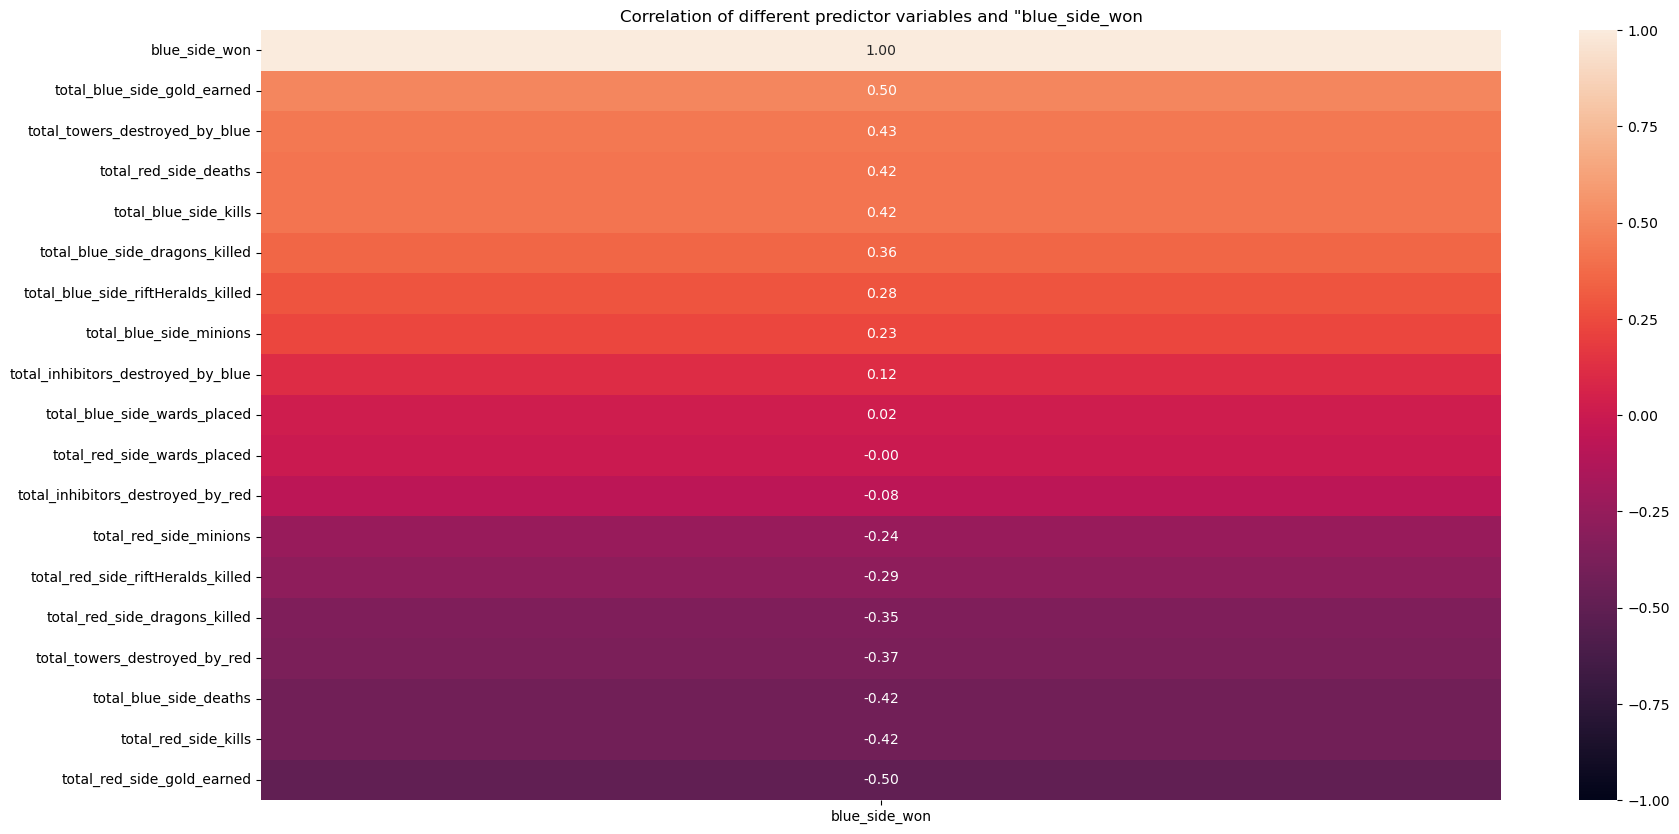

In [7]:
#visualize the correlation from above 
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr()[['blue_side_won']].sort_values(by='blue_side_won',ascending=False)
            ,vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation of different predictor variables and "blue_side_won')
plt.show()

Text(0, 0.5, 'Count')

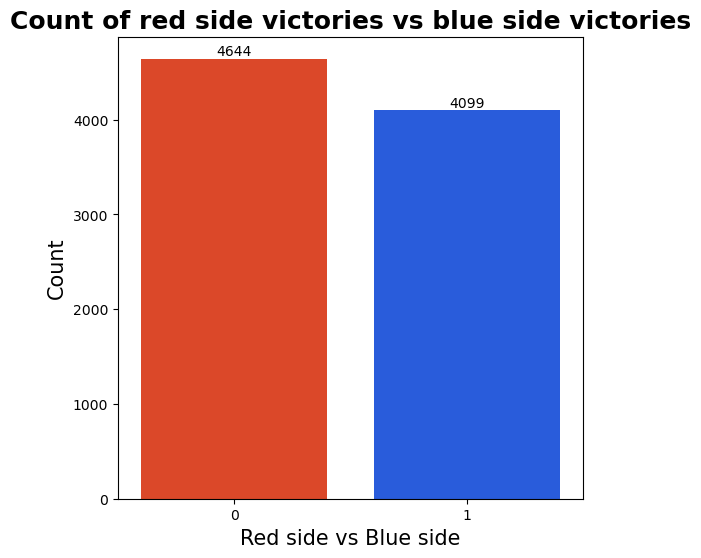

In [8]:
#check to see if there's any data imbalance present in the dataset. we can see that there are 4644 instances of 0 (red side won) and 4099 instances of 1 (blue side won)
#overall, the data seems relatively balanced. if there was a huge class imbalance we would consider resampling methods

figure, axes = plt.subplots(figsize=(6,6))
ax=sns.countplot(data=df, x= 'blue_side_won', ax = axes, palette=['#f8350c',"#0c50f8"])
ax.bar_label(ax.containers[0])
ax.set_title('Count of red side victories vs blue side victories', fontsize=18, fontweight='bold')
ax.set_xlabel('Red side vs Blue side', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
#ax.legend(labels=['Blue side victories', 'Red side victories'], loc=2, bbox_to_anchor=(1, 1))

In [9]:
df

,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
0,482,36403,79,15,16,2,0,1,0,537,37878,16,15,38,1,1,3,0,0
1,452,45450,41,31,10,2,1,8,0,400,32273,10,31,136,0,0,3,2,1
2,467,38334,39,22,12,2,1,1,0,455,35596,12,22,34,0,0,5,0,1
3,425,32749,67,12,16,0,1,0,0,466,36281,16,12,47,3,0,3,0,0
4,472,36853,47,17,8,2,1,1,0,511,32248,8,17,36,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,409,35557,37,14,22,0,1,0,0,448,39565,22,14,37,3,0,4,0,0
8739,458,37379,51,17,9,2,0,4,0,488,32714,9,17,89,0,1,1,0,1
8740,499,37200,57,14,20,0,0,2,0,523,37772,20,14,152,2,0,3,0,0
8741,425,30780,41,9,18,0,1,0,0,512,38267,18,9,73,3,0,4,0,0


In [10]:
df.min(axis=0)

total_blue_side_minions                 294
total_blue_side_gold_earned           24851
total_blue_side_wards_placed             16
total_blue_side_kills                     0
total_blue_side_deaths                    1
total_blue_side_dragons_killed            0
total_blue_side_riftHeralds_killed        0
total_towers_destroyed_by_blue            0
total_inhibitors_destroyed_by_blue        0
total_red_side_minions                  323
total_red_side_gold_earned            24931
total_red_side_kills                      1
total_red_side_deaths                     0
total_red_side_wards_placed              17
total_red_side_dragons_killed             0
total_red_side_riftHeralds_killed         0
total_towers_destroyed_by_red             0
total_inhibitors_destroyed_by_red         0
blue_side_won                             0
dtype: int64

# Make new features/columns with differences between each teams

In [11]:
df['wards_placed_diff'] = df['total_blue_side_wards_placed'] - df['total_red_side_wards_placed']
df['total_minions_diff'] = df['total_blue_side_minions'] - df['total_red_side_minions']
df['gold_earned_diff'] = df['total_blue_side_gold_earned'] - df['total_red_side_gold_earned']
df['towers_destroyed_diff'] = df['total_towers_destroyed_by_blue'] - df['total_towers_destroyed_by_red']
df['inhibitors_destroyed_diff'] = df['total_inhibitors_destroyed_by_blue'] - df['total_inhibitors_destroyed_by_red']
df['kills_diff'] = df['total_blue_side_kills'] - df['total_red_side_kills']



# EDA

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


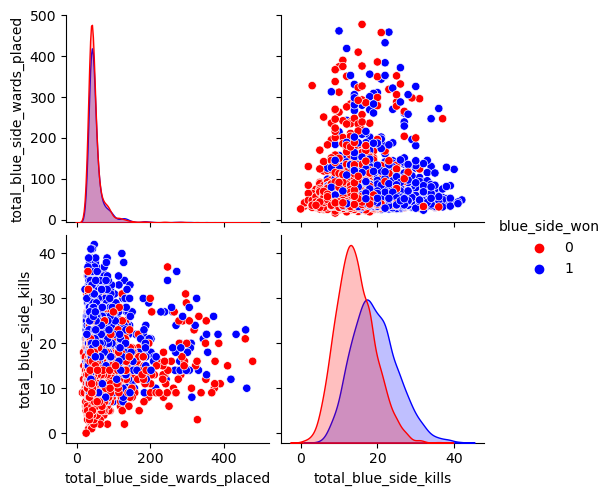

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


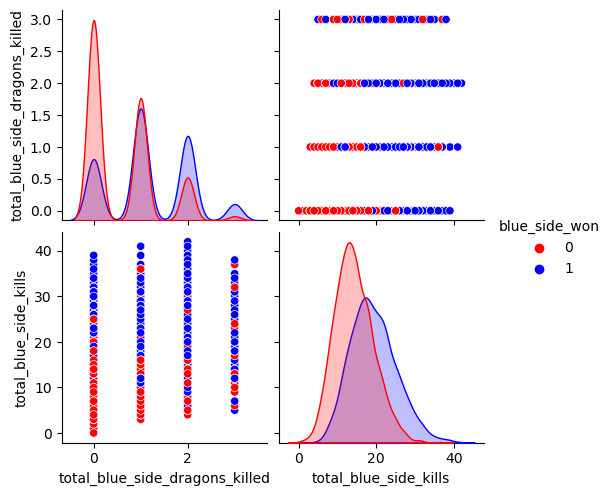

In [15]:
sns.pairplot(data=df, vars=('total_blue_side_wards_placed', 'total_blue_side_kills'), hue='blue_side_won', palette=['r','b'])
plt.show()
sns.pairplot(data=df, vars=('total_blue_side_dragons_killed','total_blue_side_kills'), hue='blue_side_won', palette=['r','b'])
plt.show()


c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


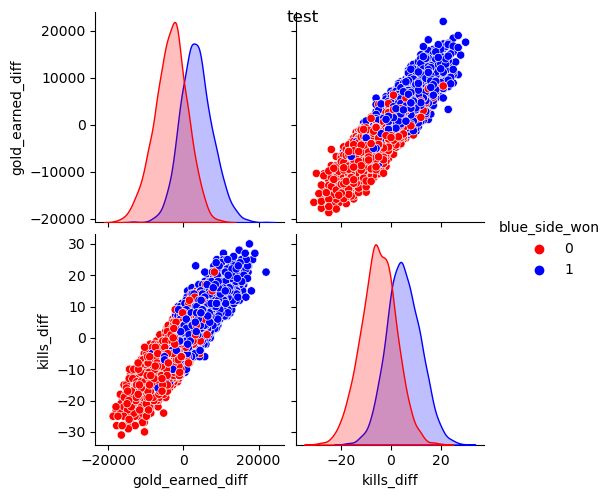

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


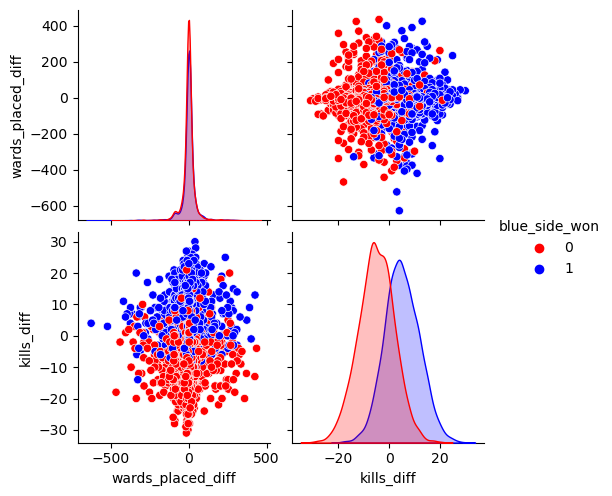

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


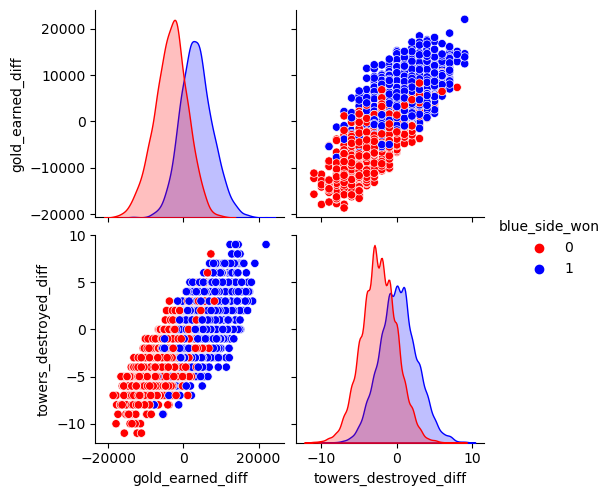

In [17]:
sns.pairplot(data=df, vars=('gold_earned_diff', 'kills_diff'), hue='blue_side_won', palette=['r','b'])  #.figure.suptitle('test') to add title
plt.show()
sns.pairplot(data=df, vars=('wards_placed_diff', 'kills_diff'), hue='blue_side_won', palette=['r','b'])
plt.show()
sns.pairplot(data=df, vars=('gold_earned_diff', 'towers_destroyed_diff'), hue='blue_side_won', palette=['r','b'])
plt.show()

# Data Pre-processing

In [18]:
#Split the dataset into X and y
X = df.drop(columns=['blue_side_won'], axis=1)
y = df['blue_side_won']

In [19]:
#use standardscaler() to scale the data

scaler = StandardScaler()

#split the dataset into testing and training sets with 70% being allocated to training and 30% allocated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

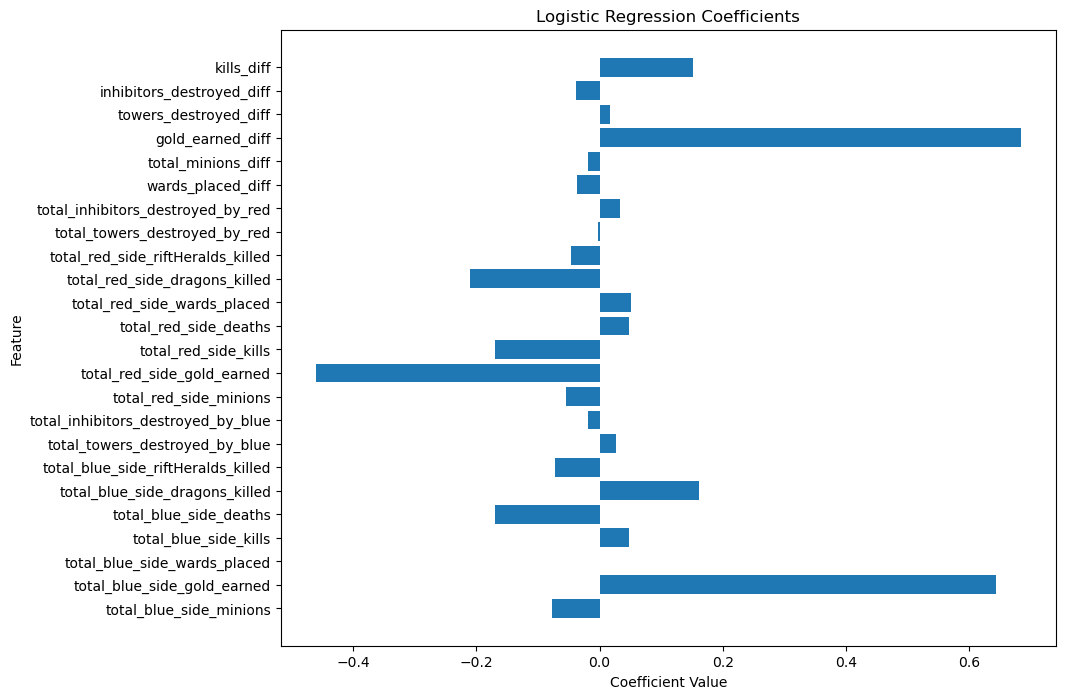

In [20]:
#fitting the logistic regression model on our data and training it
model = LogisticRegression(penalty='l2')
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
logistic_reg_acc = accuracy_score(y_test, y_pred)
coefficients = model.coef_[0]
feature_names = X.columns

confusion_mat= confusion_matrix(y_test, y_pred)

#plotting the coeffecients of logsitic regression MAKE SURE TO TALK ABOUT THIS IN THE REPORT
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

Accuracy: 0.7896
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1380
           1       0.78      0.77      0.78      1243

    accuracy                           0.79      2623
   macro avg       0.79      0.79      0.79      2623
weighted avg       0.79      0.79      0.79      2623



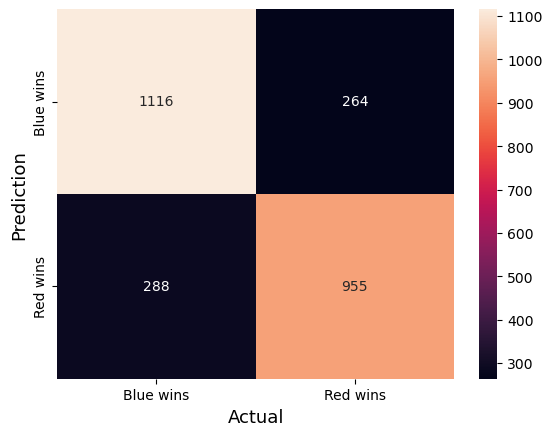

In [21]:
print('Accuracy: {:.4f}'.format(logistic_reg_acc))
print("Classification Report:")
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_mat, annot=True, fmt='g',
            xticklabels=['Blue wins','Red wins'],
            yticklabels=['Blue wins','Red wins'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

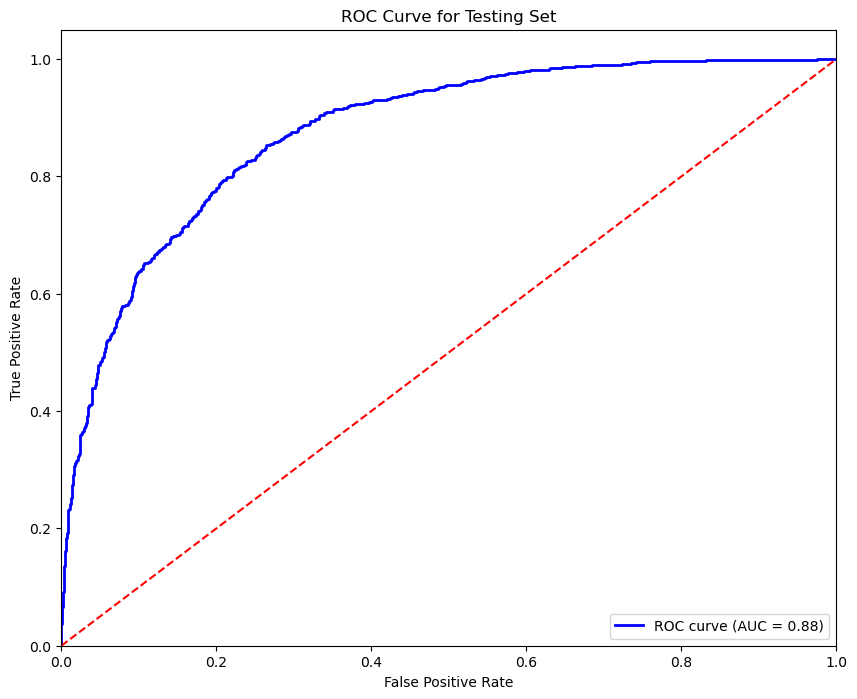

In [22]:
#ROC curves for logistic regression
y_pred_probability = model.predict_proba(scaled_X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
auc = roc_auc_score(y_test, y_pred_probability)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set')
plt.legend(loc="lower right")
plt.show()


In [23]:
knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best mean cross-validation score:", grid_search.best_score_)

best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model.fit(scaled_X_train, y_train)
y_pred = best_knn_model.predict(scaled_X_test)

accuracy = accuracy_score(y_test, y_pred)

Best parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best mean cross-validation score: 0.7598039215686274


Accuracy: 0.7968
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1380
           1       0.79      0.78      0.78      1243

    accuracy                           0.80      2623
   macro avg       0.80      0.80      0.80      2623
weighted avg       0.80      0.80      0.80      2623



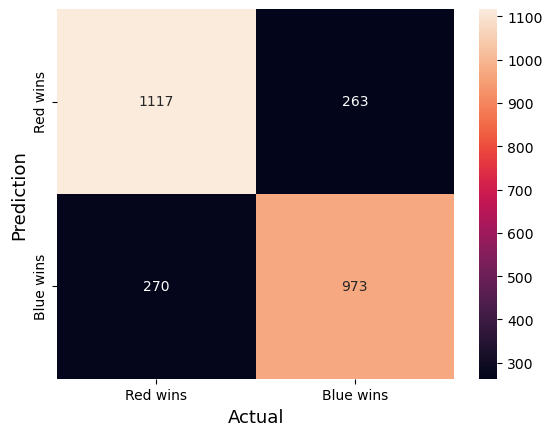

In [21]:
#using the random forest algorithm on the dataset, fitting it with the data and outputting classificaiton report and confusion matrix

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
rf_acc = accuracy_score(y_test, y_pred)

confusion_mat= confusion_matrix(y_test, y_pred)

print('Accuracy: {:.4f}'.format(rf_acc))
print("Classification Report:")
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_mat, annot=True, fmt='g',
            xticklabels=['Red wins','Blue wins'],
            yticklabels=['Red wins','Blue wins'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

